In [1]:
import glob, os
import re

In [2]:
glob_list = []

#loop through subject folders and glob
for subject in range(25):
    glob_list.append(glob.glob(str(subject) + "\\[0-9a-zA-Z]*.csv"))
    
#function to flatten glob
flatten = lambda l: [item for sublist in l for item in sublist]
glob_list = flatten(glob_list)
glob_list

['0\\0_Left.csv',
 '0\\0_Right.csv',
 '0\\10_Left.csv',
 '0\\10_Right.csv',
 '0\\1_Left.csv',
 '0\\1_Right.csv',
 '0\\2_Left.csv',
 '0\\2_Right.csv',
 '0\\3_Left.csv',
 '0\\3_Right.csv',
 '0\\4_Left.csv',
 '0\\4_Right.csv',
 '0\\5_Left.csv',
 '0\\5_Right.csv',
 '0\\6_Left.csv',
 '0\\6_Right.csv',
 '0\\7_Left.csv',
 '0\\7_Right.csv',
 '0\\8_Left.csv',
 '0\\8_Right.csv',
 '0\\9_Left.csv',
 '0\\9_Right.csv',
 '0\\Big_Left.csv',
 '0\\Big_Right.csv',
 '0\\Blue_Left.csv',
 '0\\Blue_Right.csv',
 '0\\Brush_Left.csv',
 '0\\Brush_Right.csv',
 '0\\Bug_Left.csv',
 '0\\Bug_Right.csv',
 '0\\Candy_Left.csv',
 '0\\Candy_Right.csv',
 '0\\CarDrive_Left.csv',
 '0\\CarDrive_Right.csv',
 '0\\Cat_Left.csv',
 '0\\Cat_Right.csv',
 '0\\Cereal_Left.csv',
 '0\\Cereal_Right.csv',
 '0\\Clothes_Left.csv',
 '0\\Clothes_Right.csv',
 '0\\Coat_Left.csv',
 '0\\Coat_Right.csv',
 '0\\Cold_Left.csv',
 '0\\Cold_Right.csv',
 '0\\Come_Left.csv',
 '0\\Come_Right.csv',
 '0\\Cost_Left.csv',
 '0\\Cost_Right.csv',
 '0\\Cry_Left.cs

In [3]:
#make a list of tuples of hand pairings
lr_pairs = list(zip(*[iter(glob_list)]*2))
for i in range(25):
    lr_pairs.remove((str(i)+'\\Blue_Left.csv', str(i)+'\\Blue_Right.csv'))
lr_pairs

[('0\\0_Left.csv', '0\\0_Right.csv'),
 ('0\\10_Left.csv', '0\\10_Right.csv'),
 ('0\\1_Left.csv', '0\\1_Right.csv'),
 ('0\\2_Left.csv', '0\\2_Right.csv'),
 ('0\\3_Left.csv', '0\\3_Right.csv'),
 ('0\\4_Left.csv', '0\\4_Right.csv'),
 ('0\\5_Left.csv', '0\\5_Right.csv'),
 ('0\\6_Left.csv', '0\\6_Right.csv'),
 ('0\\7_Left.csv', '0\\7_Right.csv'),
 ('0\\8_Left.csv', '0\\8_Right.csv'),
 ('0\\9_Left.csv', '0\\9_Right.csv'),
 ('0\\Big_Left.csv', '0\\Big_Right.csv'),
 ('0\\Brush_Left.csv', '0\\Brush_Right.csv'),
 ('0\\Bug_Left.csv', '0\\Bug_Right.csv'),
 ('0\\Candy_Left.csv', '0\\Candy_Right.csv'),
 ('0\\CarDrive_Left.csv', '0\\CarDrive_Right.csv'),
 ('0\\Cat_Left.csv', '0\\Cat_Right.csv'),
 ('0\\Cereal_Left.csv', '0\\Cereal_Right.csv'),
 ('0\\Clothes_Left.csv', '0\\Clothes_Right.csv'),
 ('0\\Coat_Left.csv', '0\\Coat_Right.csv'),
 ('0\\Cold_Left.csv', '0\\Cold_Right.csv'),
 ('0\\Come_Left.csv', '0\\Come_Right.csv'),
 ('0\\Cost_Left.csv', '0\\Cost_Right.csv'),
 ('0\\Cry_Left.csv', '0\\Cry_Right.c

In [4]:
import pandas as pd

df_list = []

for pair in lr_pairs:
    df_left = pd.read_csv(pair[0], index_col=None).drop(['Unnamed: 0'], axis = 1)
    df_right = pd.read_csv(pair[1], index_col=None).drop(['Unnamed: 0'], axis = 1)
    
    #rename columns
    df_left = df_left.add_prefix('left')
    df_right = df_right.add_prefix('right')
    
    #merge
    df = pd.merge(df_left, df_right, left_on='leftTime', right_on='rightTime').drop('rightTime', axis = 1)

    #covert fist column to time object
    df['leftTime'] = pd.to_datetime(df['leftTime'].str[:-3], format = '%H:%M:%S.%f')
    
    #difference between rows
    df = df.diff().iloc[1:]
    df['leftTime'] = df['leftTime'].dt.total_seconds()
    
    df.rename(columns={'leftTime':'time'}, inplace=True)
    
    #add sign and subject using regex of file name
    subject_sign = re.split(r'\\', re.findall('^[^_]+(?=_)', pair[0])[0])
    df.insert(loc = 0, column = 'Subject', value = subject_sign[0])
    df.insert(loc = 0, column = 'Sign', value = subject_sign[1])
    
#this makes velocity columns

#     for col in df.iloc[:,2:]:
#         df[col + ' velocity'] = df[col]/df['Time']
    
    df_list.append(df)

In [5]:
#numbers 0-10 for 25 subjects
len(df_list)

1500

In [6]:
#example entry
df_list[35]

,Sign,Subject,time,left thumbProximal_L_X,left thumbProximal_L_Y,left thumbProximal_L_Z,left thumbDistal_L_X,left thumbDistal_L_Y,left thumbDistal_L_Z,left thumbEF_L_X,...,right armFrontRadius_L_Z,right armFrontUlna_L_X,right armFrontUlna_L_Y,right armFrontUlna_L_Z,right armBackLateral_L_X,right armBackLateral_L_Y,right armBackLateral_L_Z,right armBackMedial_L_X,right armBackMedial_L_Y,right armBackMedial_L_Z
1,Hungry,0,0.033,-0.003069,-0.005275,0.005377,-0.003816,-0.004857,0.005608,-0.004414,...,0.004107,-0.000659,-0.002197,0.003803,-0.000530,0.001926,-0.000143,0.000351,0.001219,-0.000448
2,Hungry,0,0.026,-0.001764,-0.004115,0.001626,-0.001930,-0.003919,0.001489,-0.002002,...,0.001137,-0.000269,-0.000394,0.001037,0.000620,0.001447,-0.000302,0.001102,0.001161,-0.000402
3,Hungry,0,0.029,-0.001353,-0.002294,0.002112,-0.001203,-0.001881,0.001159,-0.001035,...,0.001369,-0.000648,-0.000467,0.001406,0.000575,0.000405,0.001136,0.001011,0.000304,0.001173
4,Hungry,0,0.035,-0.002852,0.002370,-0.002223,-0.002433,0.002183,-0.002436,-0.001816,...,0.000532,0.000103,0.000654,0.000618,0.002438,0.000376,0.001927,0.002455,0.000469,0.002012
5,Hungry,0,0.032,-0.002808,0.001876,-0.002413,-0.002978,0.001908,-0.002239,-0.002983,...,0.000638,-0.000744,0.000458,0.000887,0.000344,-0.000738,0.002516,0.000463,-0.000483,0.002765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Hungry,0,0.032,-0.000166,0.000071,-0.000069,-0.000172,-0.000106,0.000143,-0.000245,...,0.000532,-0.005505,-0.002449,-0.000298,-0.003224,-0.002921,0.002098,-0.004334,-0.002862,0.001267
757,Hungry,0,0.033,-0.000562,0.000314,-0.000336,-0.000559,0.000229,-0.000243,-0.000552,...,0.001466,-0.006570,-0.003300,0.000742,-0.003565,-0.004649,0.004747,-0.004666,-0.004443,0.004024
758,Hungry,0,0.035,-0.000995,0.000647,-0.000363,-0.001169,0.000992,-0.000595,-0.001157,...,0.000672,-0.006849,-0.002689,0.000387,-0.003166,-0.002175,0.003335,-0.003353,-0.002255,0.003049
759,Hungry,0,0.377,-0.000041,0.000389,-0.002611,0.000293,0.001245,-0.004029,0.000969,...,0.001266,-0.052832,-0.009714,-0.006717,0.004473,0.040545,0.023070,0.007423,0.034512,0.015088


In [7]:
#concatenate list of frames
sign_frame = pd.concat(df_list, axis=0, ignore_index=False)
sign_frame

,Sign,Subject,time,left thumbProximal_L_X,left thumbProximal_L_Y,left thumbProximal_L_Z,left thumbDistal_L_X,left thumbDistal_L_Y,left thumbDistal_L_Z,left thumbEF_L_X,...,right armFrontRadius_L_Z,right armFrontUlna_L_X,right armFrontUlna_L_Y,right armFrontUlna_L_Z,right armBackLateral_L_X,right armBackLateral_L_Y,right armBackLateral_L_Z,right armBackMedial_L_X,right armBackMedial_L_Y,right armBackMedial_L_Z
1,0,0,0.028,0.000388,0.000133,0.000050,0.000406,0.000153,0.000063,0.000403,...,-0.000321,-0.000166,0.000114,-0.000298,-8.360000e-05,-0.000393,-0.000142,-0.000071,-0.000331,-0.000119
2,0,0,0.036,0.000420,0.000077,-0.000248,0.000443,0.000085,-0.000239,0.000429,...,-0.000235,-0.000095,0.000121,-0.000193,4.000000e-05,-0.000276,-0.000075,0.000035,-0.000261,-0.000034
3,0,0,0.033,0.000223,0.000264,-0.000160,0.000164,0.000275,-0.000170,0.000121,...,-0.000251,-0.000084,0.000163,-0.000204,-1.250000e-04,-0.000481,0.000008,-0.000147,-0.000522,0.000054
4,0,0,0.034,0.000103,0.000078,-0.000318,0.000105,0.000103,-0.000307,0.000054,...,-0.000213,-0.000179,0.000077,-0.000056,1.000000e-07,-0.000630,0.000164,-0.000104,-0.000869,0.000321
5,0,0,0.036,0.000055,0.000233,-0.000030,0.000002,0.000263,-0.000031,-0.000022,...,-0.000001,0.000016,0.000356,0.000150,5.750000e-04,0.000152,0.000179,0.000504,0.000025,0.000330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Yellow,24,0.041,-0.000081,0.000077,-0.000299,-0.000051,-0.000085,-0.000311,-0.000089,...,0.000739,-0.003499,-0.001501,-0.000228,-2.789460e-02,-0.018280,0.000122,-0.026445,-0.018375,-0.000844
840,Yellow,24,0.040,-0.000211,0.000190,-0.000301,-0.000174,0.000163,-0.000348,-0.000167,...,-0.002417,-0.001886,-0.000467,-0.002440,-6.380100e-03,0.002420,-0.007261,-0.008172,-0.000481,-0.007284
841,Yellow,24,0.041,-0.000124,0.000341,-0.000163,-0.000145,0.000336,-0.000134,-0.000140,...,-0.001664,0.001196,0.001054,-0.001449,9.235200e-03,0.008616,-0.003942,0.007797,0.007248,-0.003728
842,Yellow,24,0.034,-0.000187,0.000359,-0.000166,-0.000138,0.000345,-0.000232,-0.000073,...,-0.000334,0.000911,0.000960,-0.000300,7.136000e-04,0.000893,-0.000346,0.000451,0.000660,-0.000311


# Let's write a class for feature extraction:

In [8]:
pairs = pd.read_csv('pairs.csv')
pairs = list(zip(pairs['0'], pairs['1']))

In [9]:
from itertools import combinations
from sklearn import linear_model

class extraction:
    def __init__(self, df):
        self.df = df
        self.features = dict()
        
    def label(self):
        self.features['label'] = self.df['Sign'].iloc[0]
        self.df = self.df.iloc[:, 2:]
        
    def mean(self):
        for col in self.df:
            self.features[col + ' mean'] = self.df[col].mean()
            
    def stdev(self):
        for col in self.df:
            self.features[col + ' stdev'] = self.df[col].std()
    
    def linear(self):
        #use this for all combinations
        cc = list(combinations(self.df.columns,2))
        
        for pair in pairs:
            try:
                regr = linear_model.LinearRegression()
                regr.fit(self.df[[pair[0]]], self.df[[pair[1]]])
                
                self.features[(pair[0], pair[1],'weight')] = regr.coef_[0][0] 
                
                r2 = regr.score(regr.predict(self.df[[pair[0]]]), self.df[[pair[1]]])
                self.features[(pair[0],pair[1],'R2')] = r2 
            except:
                continue
            
            
    def extract_features(self):
        self.label()
        self.mean()
        self.stdev()
        #self.linear()

###########################################################################################

# Example:

In [10]:
df_list[0]

,Sign,Subject,time,left thumbProximal_L_X,left thumbProximal_L_Y,left thumbProximal_L_Z,left thumbDistal_L_X,left thumbDistal_L_Y,left thumbDistal_L_Z,left thumbEF_L_X,...,right armFrontRadius_L_Z,right armFrontUlna_L_X,right armFrontUlna_L_Y,right armFrontUlna_L_Z,right armBackLateral_L_X,right armBackLateral_L_Y,right armBackLateral_L_Z,right armBackMedial_L_X,right armBackMedial_L_Y,right armBackMedial_L_Z
1,0,0,0.028,0.000388,0.000133,0.000050,0.000406,0.000153,0.000063,0.000403,...,-0.000321,-0.000166,0.000114,-0.000298,-8.360000e-05,-0.000393,-0.000142,-0.000071,-0.000331,-0.000119
2,0,0,0.036,0.000420,0.000077,-0.000248,0.000443,0.000085,-0.000239,0.000429,...,-0.000235,-0.000095,0.000121,-0.000193,4.000000e-05,-0.000276,-0.000075,0.000035,-0.000261,-0.000034
3,0,0,0.033,0.000223,0.000264,-0.000160,0.000164,0.000275,-0.000170,0.000121,...,-0.000251,-0.000084,0.000163,-0.000204,-1.250000e-04,-0.000481,0.000008,-0.000147,-0.000522,0.000054
4,0,0,0.034,0.000103,0.000078,-0.000318,0.000105,0.000103,-0.000307,0.000054,...,-0.000213,-0.000179,0.000077,-0.000056,1.000000e-07,-0.000630,0.000164,-0.000104,-0.000869,0.000321
5,0,0,0.036,0.000055,0.000233,-0.000030,0.000002,0.000263,-0.000031,-0.000022,...,-0.000001,0.000016,0.000356,0.000150,5.750000e-04,0.000152,0.000179,0.000504,0.000025,0.000330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,0,0.042,0.000234,0.000309,-0.000214,0.000329,0.000273,-0.000204,0.000371,...,0.000295,0.001436,0.000441,0.000373,-8.165000e-04,-0.000436,-0.000397,-0.000785,-0.000404,-0.000319
686,0,0,0.046,0.000256,0.000157,-0.000107,0.000251,0.000190,-0.000097,0.000228,...,0.000138,0.002025,0.000737,0.000454,-1.395300e-03,-0.001677,-0.000466,-0.001304,-0.001543,-0.000149
687,0,0,0.043,0.000210,0.000039,-0.000039,0.000226,0.000065,-0.000026,0.000216,...,-0.000251,0.002495,0.001583,-0.000102,-1.360000e-03,-0.000036,-0.001245,-0.001321,0.000028,-0.001097
688,0,0,0.059,-0.000083,0.000201,0.000012,-0.000046,0.000252,0.000038,-0.000039,...,-0.000735,0.005017,0.002821,0.000149,-2.756600e-03,-0.002480,-0.001475,-0.001811,-0.002021,-0.000591


In [11]:
class_example = extraction(df_list[0])

In [12]:
%%time
class_example.extract_features()

Wall time: 32.1 ms


In [13]:
class_example.features

{'label': '0',
 'time mean': 0.0435732946298984,
 'left thumbProximal_L_X mean': 9.093222060957905e-06,
 'left thumbProximal_L_Y mean': 1.3063599419448466e-05,
 'left thumbProximal_L_Z mean': -3.5371552975326123e-06,
 'left thumbDistal_L_X mean': 9.338316400580548e-06,
 'left thumbDistal_L_Y mean': 1.5072554426705366e-05,
 'left thumbDistal_L_Z mean': -2.7464441219158395e-06,
 'left thumbEF_L_X mean': 1.0285050798258355e-05,
 'left thumbEF_L_Y mean': 1.5039419448476045e-05,
 'left thumbEF_L_Z mean': -1.7150943396226527e-06,
 'left indexProximal_L_X mean': 4.504934687953546e-06,
 'left indexProximal_L_Y mean': 1.4902699564586361e-05,
 'left indexProximal_L_Z mean': -7.605805515239526e-06,
 'left indexMedial_L_X mean': 6.797822931785194e-06,
 'left indexMedial_L_Y mean': 1.6415341074020313e-05,
 'left indexMedial_L_Z mean': -5.068940493468809e-06,
 'left indexDistal_L_X mean': 9.89927431059506e-06,
 'left indexDistal_L_Y mean': 1.6352380261248164e-05,
 'left indexDistal_L_Z mean': -5.336

In [14]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

########################################################################################

# Run this for list. I picked an arbitarary sign

In [15]:
# R2s = [(key[:2], value) for key, value in class_example.features.items() if ('R2' in key and value > .5)]
# R2s = [item[0] for item in R2s]

In [16]:
# pd.DataFrame(R2s).to_csv('pairs.csv', index = False)

In [17]:
# plt.hist(R2s)

In [18]:
# greater_than = [True if x > .5 else False for x in R2s]

In [19]:
# sum(greater_than)

In [20]:
# sum(greater_than) / len(R2s)

#####################################################################################

## Make list of dicts to dataframe:

In [21]:
# #this removes left hand
# for idx, df in enumerate(df_list):
#     df_list[idx] = df.loc[:,~df.columns.str.startswith('left')]

In [22]:
df_list[0]

,Sign,Subject,time,left thumbProximal_L_X,left thumbProximal_L_Y,left thumbProximal_L_Z,left thumbDistal_L_X,left thumbDistal_L_Y,left thumbDistal_L_Z,left thumbEF_L_X,...,right armFrontRadius_L_Z,right armFrontUlna_L_X,right armFrontUlna_L_Y,right armFrontUlna_L_Z,right armBackLateral_L_X,right armBackLateral_L_Y,right armBackLateral_L_Z,right armBackMedial_L_X,right armBackMedial_L_Y,right armBackMedial_L_Z
1,0,0,0.028,0.000388,0.000133,0.000050,0.000406,0.000153,0.000063,0.000403,...,-0.000321,-0.000166,0.000114,-0.000298,-8.360000e-05,-0.000393,-0.000142,-0.000071,-0.000331,-0.000119
2,0,0,0.036,0.000420,0.000077,-0.000248,0.000443,0.000085,-0.000239,0.000429,...,-0.000235,-0.000095,0.000121,-0.000193,4.000000e-05,-0.000276,-0.000075,0.000035,-0.000261,-0.000034
3,0,0,0.033,0.000223,0.000264,-0.000160,0.000164,0.000275,-0.000170,0.000121,...,-0.000251,-0.000084,0.000163,-0.000204,-1.250000e-04,-0.000481,0.000008,-0.000147,-0.000522,0.000054
4,0,0,0.034,0.000103,0.000078,-0.000318,0.000105,0.000103,-0.000307,0.000054,...,-0.000213,-0.000179,0.000077,-0.000056,1.000000e-07,-0.000630,0.000164,-0.000104,-0.000869,0.000321
5,0,0,0.036,0.000055,0.000233,-0.000030,0.000002,0.000263,-0.000031,-0.000022,...,-0.000001,0.000016,0.000356,0.000150,5.750000e-04,0.000152,0.000179,0.000504,0.000025,0.000330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,0,0.042,0.000234,0.000309,-0.000214,0.000329,0.000273,-0.000204,0.000371,...,0.000295,0.001436,0.000441,0.000373,-8.165000e-04,-0.000436,-0.000397,-0.000785,-0.000404,-0.000319
686,0,0,0.046,0.000256,0.000157,-0.000107,0.000251,0.000190,-0.000097,0.000228,...,0.000138,0.002025,0.000737,0.000454,-1.395300e-03,-0.001677,-0.000466,-0.001304,-0.001543,-0.000149
687,0,0,0.043,0.000210,0.000039,-0.000039,0.000226,0.000065,-0.000026,0.000216,...,-0.000251,0.002495,0.001583,-0.000102,-1.360000e-03,-0.000036,-0.001245,-0.001321,0.000028,-0.001097
688,0,0,0.059,-0.000083,0.000201,0.000012,-0.000046,0.000252,0.000038,-0.000039,...,-0.000735,0.005017,0.002821,0.000149,-2.756600e-03,-0.002480,-0.001475,-0.001811,-0.002021,-0.000591


In [23]:
%%time
features = []

for df in df_list:
    class_obj = extraction(df)
    class_obj.extract_features()
    
    features.append(class_obj.features)

Wall time: 42.8 s


In [24]:
feature_frame = pd.DataFrame(features)

In [25]:
feature_frame

,label,time mean,left thumbProximal_L_X mean,left thumbProximal_L_Y mean,left thumbProximal_L_Z mean,left thumbDistal_L_X mean,left thumbDistal_L_Y mean,left thumbDistal_L_Z mean,left thumbEF_L_X mean,left thumbEF_L_Y mean,...,right armFrontRadius_L_Z stdev,right armFrontUlna_L_X stdev,right armFrontUlna_L_Y stdev,right armFrontUlna_L_Z stdev,right armBackLateral_L_X stdev,right armBackLateral_L_Y stdev,right armBackLateral_L_Z stdev,right armBackMedial_L_X stdev,right armBackMedial_L_Y stdev,right armBackMedial_L_Z stdev
0,0,0.043573,9.093222e-06,0.000013,-0.000004,0.000009,0.000015,-0.000003,0.000010,1.503942e-05,...,0.001306,0.008528,0.003903,0.001664,0.004401,0.004467,0.002841,0.004745,0.004753,0.003106
1,10,0.065428,1.764326e-05,0.000009,-0.000047,0.000027,0.000015,-0.000048,0.000030,2.189573e-05,...,0.012722,0.010486,0.009188,0.008971,0.013719,0.012821,0.012200,0.012339,0.011673,0.007522
2,1,0.041300,5.417744e-06,0.000025,-0.000021,0.000003,0.000027,-0.000021,0.000002,2.804169e-05,...,0.003617,0.007919,0.003711,0.002163,0.005381,0.005544,0.004783,0.005855,0.006204,0.004511
3,2,0.041766,-3.434540e-07,0.000022,-0.000014,0.000005,0.000028,-0.000012,0.000009,3.056251e-05,...,0.004022,0.007967,0.003592,0.003021,0.006177,0.006004,0.005082,0.006624,0.006283,0.004975
4,3,0.043742,-1.805375e-05,0.000025,-0.000018,-0.000017,0.000032,-0.000018,-0.000015,3.621740e-05,...,0.005426,0.006718,0.004382,0.003478,0.005747,0.004286,0.005211,0.005767,0.004373,0.004265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Where,0.037210,1.229814e-05,0.000010,-0.000021,0.000012,0.000005,-0.000016,0.000010,5.541460e-07,...,0.004439,0.003270,0.003780,0.003258,0.010284,0.010250,0.009895,0.009245,0.010470,0.009794
1496,Why,0.036897,2.341939e-05,-0.000011,-0.000010,0.000024,-0.000005,-0.000014,0.000026,-4.515725e-07,...,0.005103,0.001981,0.005069,0.005193,0.002272,0.003978,0.002913,0.002436,0.004226,0.002917
1497,With,0.030994,-8.171311e-07,0.000023,-0.000060,-0.000003,0.000032,-0.000066,-0.000004,4.140293e-05,...,0.001720,0.003172,0.001762,0.001454,0.003406,0.003086,0.002807,0.002821,0.002635,0.002673
1498,Work,0.036911,1.189319e-04,-0.000093,0.000010,0.000134,-0.000098,-0.000011,0.000150,-8.895908e-05,...,0.002775,0.009563,0.003234,0.002800,0.005883,0.006184,0.006416,0.005009,0.005064,0.006599


In [26]:
y = feature_frame.fillna(0).label
X = feature_frame.fillna(0).drop(['label'], axis = 1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
accuracy = []

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    #clf.scalings_
    accuracy.append(clf.score(X_test,y_test))

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\chenson\appdata\local

(array([ 1.,  1.,  3.,  2.,  5.,  7., 12., 11.,  2.,  6.]),
 array([0.75666667, 0.76633333, 0.776     , 0.78566667, 0.79533333,
        0.805     , 0.81466667, 0.82433333, 0.834     , 0.84366667,
        0.85333333]),
 <a list of 10 Patch objects>)

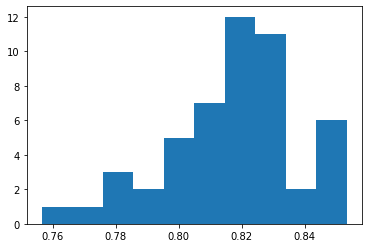

In [34]:
plt.hist(accuracy, bins=10)